In [1]:
import pandas as pd #import pandas library as pd
df = pd.read_csv('test1.csv') #reads the csv file and creates a Pandas DataFrame object df
df.head() #head() shows the first 5 rows

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NABIL,3/1/2021,1259.0,1315.0,1259.0,1314.0,0.00,102909
1,NABIL,3/2/2021,1320.0,1323.0,1250.0,1274.0,-3.04,133848
2,NABIL,3/3/2021,1258.0,1270.0,1226.0,1244.0,-2.35,152652
3,NABIL,3/4/2021,1268.0,1314.0,1260.0,1300.0,4.50,155720
4,NABIL,3/8/2021,1300.0,1305.0,1271.0,1285.0,-1.15,67034


In [2]:
df1 = df.reset_index()['Close'] #Close column of the "df" DataFrame and assigns it to a new variable called "df1"

In [3]:
df1 #prints df1

0      1314.0
1      1274.0
2      1244.0
3      1300.0
4      1285.0
        ...  
494     606.5
495     609.0
496     603.0
497     597.8
498     589.9
Name: Close, Length: 499, dtype: float64

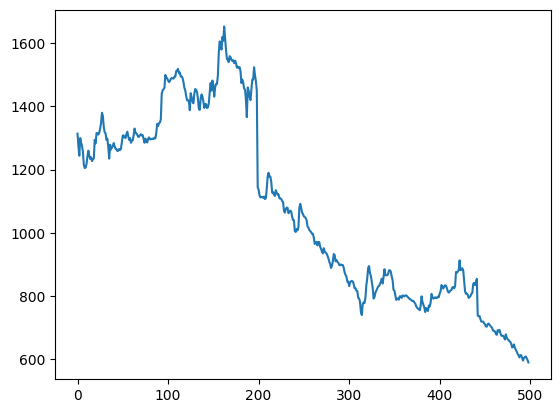

In [4]:
import matplotlib.pyplot as plt  # imports the Matplotlib library and assigns it the alias "plt"
plt.plot(df1) #line plot of the values in the "Close" column

In [5]:
import numpy as np # imports the numpy library and assigns it the alias "np"
df1
Ytesting = df1[425:499] #it selects rows with integer indices from 425 to 498 
Ytesting

425    888.0
426    881.0
427    846.0
428    815.0
429    807.1
       ...  
494    606.5
495    609.0
496    603.0
497    597.8
498    589.9
Name: Close, Length: 74, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler #imports the MinMaxScaler class from the sklearn.preprocessing
scaler=MinMaxScaler(feature_range=(0,1)) #sets the feature_range parameter to (0,1)
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))  #reshape(-1,1) to convert it from a one-dimensional array

In [7]:
print(df1)

[[0.68112125]
 [0.64349544]
 [0.61527608]
 [0.66795222]
 [0.65384254]
 [0.64443608]
 [0.62562318]
 [0.58799737]
 [0.57859091]
 [0.5804722 ]
 [0.59175995]
 [0.61433543]
 [0.6303264 ]
 [0.61527608]
 [0.60586963]
 [0.61057285]
 [0.59928511]
 [0.60398834]
 [0.60775092]
 [0.66230834]
 [0.65196125]
 [0.68300254]
 [0.68206189]
 [0.67829931]
 [0.68394319]
 [0.69617157]
 [0.71310319]
 [0.74320384]
 [0.73379739]
 [0.7008748 ]
 [0.68488383]
 [0.68206189]
 [0.66230834]
 [0.66607092]
 [0.63973286]
 [0.60681027]
 [0.64819866]
 [0.63408899]
 [0.63973286]
 [0.64443608]
 [0.65290189]
 [0.64349544]
 [0.63597028]
 [0.63502963]
 [0.62938576]
 [0.6303264 ]
 [0.63502963]
 [0.63220769]
 [0.63691092]
 [0.65666447]
 [0.67547738]
 [0.67547738]
 [0.66983351]
 [0.66795222]
 [0.67923996]
 [0.68676512]
 [0.67359609]
 [0.66230834]
 [0.66795222]
 [0.65384254]
 [0.66042705]
 [0.6613677 ]
 [0.67641802]
 [0.69617157]
 [0.68300254]
 [0.68206189]
 [0.67735867]
 [0.6717148 ]
 [0.6717148 ]
 [0.67641802]
 [0.67923996]
 [0.67

In [8]:
#Splitting our data set into train set and test set with the ratio of 70-30.
training_size=int(len(df1)*0.70) #70% of the length of the df1 NumPy array and assigns it to the variable training_size
test_size=len(df1)-training_size #number of elements in the testing set
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1] #create two new NumPy arrays, train_data and test_data, by splitting the df1
training_size,test_size #displays the values 


(349, 150)

In [9]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1): #defines a function create_dataset that takes two arguments
    dataX, dataY = [], [] #initializes two empty lists, will be used to store the input and output sequences for the LSTM model
    for i in range(len(dataset)-time_step-1): #loop to iterate over each element in the dataset array
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0]) #corresponding output value is added to the dataY list
    return numpy.array(dataX), numpy.array(dataY) #Finally the function returns dataX and dataY as NumPy arrays

In [10]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 75
X_train, y_train = create_dataset(train_data, time_step) #input and output sequences for the training set
X_test, ytest = create_dataset(test_data, time_step) #input and output sequences for the testing set
print(X_train.shape),print(y_train.shape) #shape(attribute of NumPy) shapes are printed in separate lines
print(X_test.shape),print(ytest.shape)


(273, 75)
(273,)
(74, 75)
(74,)


(None, None)

In [11]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) #first argument is the number of samples in the array
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1) #the second argument is the number of time steps in each input sequence
print(X_test) #third argument is the number of features for each time step(one variable in the time series)

[[[0.21616029]
  [0.21362054]
  [0.20045151]
  ...
  [0.27476249]
  [0.30392249]
  [0.27476249]]

 [[0.21362054]
  [0.20045151]
  [0.1864359 ]
  ...
  [0.30392249]
  [0.27476249]
  [0.27570313]]

 [[0.20045151]
  [0.1864359 ]
  [0.18822312]
  ...
  [0.27476249]
  [0.27570313]
  [0.28040636]]

 ...

 [[0.27005926]
  [0.27476249]
  [0.30392249]
  ...
  [0.00573794]
  [0.0132631 ]
  [0.01561471]]

 [[0.27476249]
  [0.30392249]
  [0.27476249]
  ...
  [0.0132631 ]
  [0.01561471]
  [0.01796632]]

 [[0.30392249]
  [0.27476249]
  [0.27570313]
  ...
  [0.01561471]
  [0.01796632]
  [0.01232245]]]


In [12]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential #necessary modules from the TensorFlow Keras library 
from tensorflow.keras.layers import Dense       #for building a sequential model with LSTM layers
from tensorflow.keras.layers import LSTM

In [13]:
#builds an LSTM neural network model using the TensorFlow Keras library
model=Sequential()  #Sequential class is used to create a sequential model
model.add(LSTM(50,return_sequences=True,input_shape=(75,1))) #specifies the shape of the input sequences
model.add(LSTM(50,return_sequences=True))  #return the full sequence of outputs, instead of just the last output
model.add(LSTM(50)) #does not return sequences
model.add(Dense(1)) #single output unit, which is used to make a single prediction
model.compile(loss='mean_squared_error',optimizer='adam') #mean_squared_error=common loss function used for regression problems

#adam= popular optimization algorithm used to train neural networks.

In [14]:
model.summary() #summary of the model architecture((batch_size, time_steps, num_features))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 75, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=75,batch_size=64,verbose=1) #trains the LSTM model using the fit method of Keras

Epoch 1/75
5/5 [==============================] - 0s 89ms/step - loss: 7.1911e-04 - val_loss: 0.0020
Epoch 2/75
5/5 [==============================] - 0s 82ms/step - loss: 6.8702e-04 - val_loss: 0.0022
Epoch 3/75
5/5 [==============================] - 0s 83ms/step - loss: 6.9035e-04 - val_loss: 0.0024
Epoch 4/75
5/5 [==============================] - 0s 82ms/step - loss: 6.7833e-04 - val_loss: 0.0024
Epoch 5/75
5/5 [==============================] - 0s 81ms/step - loss: 7.8090e-04 - val_loss: 0.0023
Epoch 6/75
5/5 [==============================] - 0s 81ms/step - loss: 6.6144e-04 - val_loss: 0.0024
Epoch 7/75
5/5 [==============================] - 0s 81ms/step - loss: 8.6487e-04 - val_loss: 0.0022
Epoch 8/75
5/5 [==============================] - 0s 84ms/step - loss: 7.4701e-04 - val_loss: 0.0026
Epoch 9/75
5/5 [==============================] - 0s 82ms/step - loss: 7.9405e-04 - val_loss: 0.0021
Epoch 10/75
5/5 [==============================] - 0s 82ms/step - loss: 7.8366e-04 - val_lo

In [44]:
#scaling the predicted data from the train set to its actual values
#generate predictions for the training and test datasets
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)# inverse_transform method of the MinMaxScaler
test_predict=scaler.inverse_transform(test_predict)

3/3 [==============================] - 0s 17ms/step


In [45]:
print(test_predict.shape)
test_predict #contains the predicted values for the test dataset(74 rows and 1 column)

(74, 1)


array([[874.406  ],
       [871.37933],
       [868.5737 ],
       [865.41943],
       [854.89575],
       [837.5088 ],
       [821.4924 ],
       [811.7008 ],
       [806.9196 ],
       [803.7478 ],
       [802.67175],
       [803.48737],
       [806.26886],
       [809.7582 ],
       [817.8797 ],
       [827.1019 ],
       [832.5085 ],
       [835.6761 ],
       [839.1894 ],
       [817.8516 ],
       [790.1059 ],
       [768.842  ],
       [755.00934],
       [746.65753],
       [742.6229 ],
       [741.4898 ],
       [741.1477 ],
       [740.6152 ],
       [738.92114],
       [736.7059 ],
       [735.5857 ],
       [735.5286 ],
       [735.3074 ],
       [734.24976],
       [732.3159 ],
       [729.56976],
       [725.83704],
       [722.18   ],
       [719.07007],
       [715.9507 ],
       [712.85864],
       [712.15533],
       [712.60394],
       [714.0127 ],
       [714.3543 ],
       [712.78595],
       [710.3222 ],
       [707.9499 ],
       [705.6394 ],
       [702.841  ],


In [46]:
len(train_predict) #LSTM model made 273 predictions for the training dataset(273 rows)

273

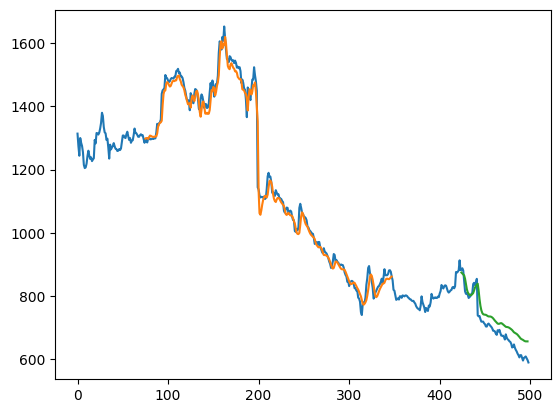

In [48]:
#plotting the data predicted, blue denotes the dataset values ,
#orange denotes the train-set and the green denotes the predicted data set of the test data
look_back=75
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [49]:
#Checking the accuracy of the LSTM Model of the test-set on the basis of the train-set
from sklearn.metrics import r2_score
r2_score(Ytesting,test_predict)

0.673722503097098

In [21]:
len(test_data)

150

In [22]:
150-75


75

In [23]:
x_input=test_data[75:].reshape(1,-1)
x_input

array([[0.27570313, 0.28040636, 0.27382184, 0.24089926, 0.21173925,
        0.20430816, 0.20515474, 0.20139216, 0.1919857 , 0.19480764,
        0.19762957, 0.20421409, 0.20703603, 0.23337409, 0.23713668,
        0.23045809, 0.23807732, 0.24889474, 0.14025021, 0.13742828,
        0.13827486, 0.12896247, 0.12153137, 0.12143731, 0.12162544,
        0.11673408, 0.11391214, 0.10723356, 0.1068573 , 0.11381808,
        0.11579343, 0.11212492, 0.10883266, 0.10591666, 0.10168376,
        0.09453485, 0.09415859, 0.0922773 , 0.08569279, 0.0822124 ,
        0.09594582, 0.0922773 , 0.09698053, 0.08757408, 0.08004891,
        0.07957859, 0.07957859, 0.07553382, 0.06829085, 0.08371743,
        0.07440504, 0.06923149, 0.06687988, 0.0631173 , 0.06123601,
        0.0556862 , 0.04458659, 0.04618568, 0.05371085, 0.04421033,
        0.03762581, 0.03301665, 0.02643213, 0.02172891, 0.01514439,
        0.02172891, 0.02172891, 0.01420374, 0.00573794, 0.0132631 ,
        0.01561471, 0.01796632, 0.01232245, 0.00

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.2757031323487913,
 0.28040635876211084,
 0.27382184178346347,
 0.24089925689022673,
 0.21173925312764563,
 0.2043081553946008,
 0.20515473614899826,
 0.20139215501834262,
 0.19198570219170352,
 0.19480763803969525,
 0.19762957388768698,
 0.20421409086633435,
 0.20703602671432608,
 0.23337409462891545,
 0.2371366757595711,
 0.2304580942526573,
 0.238077321042235,
 0.24889474179286997,
 0.14025021164518858,
 0.13742827579719685,
 0.13827485655159444,
 0.12896246825322177,
 0.12153137052017693,
 0.1214373059919105,
 0.12162543504844325,
 0.11673407957859094,
 0.11391214373059921,
 0.10723356222368541,
 0.10685730411061989,
 0.11381807920233278,
 0.11579343429592703,
 0.11212491769353783,
 0.10883265920421414,
 0.10591665882795598,
 0.10168375505596838,
 0.09453485090772273,
 0.09415859279465721,
 0.0922773022293294,
 0.08569278525068202,
 0.08221239770482547,
 0.0959458188317186,
 0.0922773022293294,
 0.09698052864264883,
 0.08757407581600984,
 0.08004891355469856,
 0.07957859091336661

In [25]:
#prediction of the 30 Days
from numpy import array

lst_output=[]
n_steps=75
i=0
while(i<30):
    
    if(len(temp_input)>75):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01451527]
76
1 day input [0.28040636 0.27382184 0.24089926 0.21173925 0.20430816 0.20515474
 0.20139216 0.1919857  0.19480764 0.19762957 0.20421409 0.20703603
 0.23337409 0.23713668 0.23045809 0.23807732 0.24889474 0.14025021
 0.13742828 0.13827486 0.12896247 0.12153137 0.12143731 0.12162544
 0.11673408 0.11391214 0.10723356 0.1068573  0.11381808 0.11579343
 0.11212492 0.10883266 0.10591666 0.10168376 0.09453485 0.09415859
 0.0922773  0.08569279 0.0822124  0.09594582 0.0922773  0.09698053
 0.08757408 0.08004891 0.07957859 0.07957859 0.07553382 0.06829085
 0.08371743 0.07440504 0.06923149 0.06687988 0.0631173  0.06123601
 0.0556862  0.04458659 0.04618568 0.05371085 0.04421033 0.03762581
 0.03301665 0.02643213 0.02172891 0.01514439 0.02172891 0.02172891
 0.01420374 0.00573794 0.0132631  0.01561471 0.01796632 0.01232245
 0.0074311  0.         0.01451527]
1 day output [[0.01274333]]
2 day input [0.27382184 0.24089926 0.21173925 0.20430816 0.20515474 0.20139216
 0.1919857  0.19480764 0.1

In [26]:
day_new = np.arange(1,76)
day_pred = np.arange(76,106)

In [27]:
import matplotlib.pyplot as plt
len(df1)

499

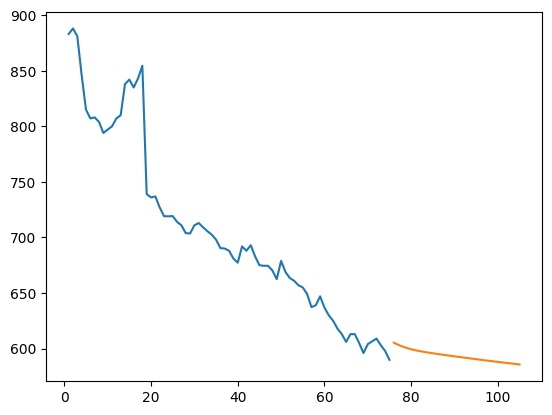

In [28]:
plt.plot(day_new,scaler.inverse_transform(df1[424:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

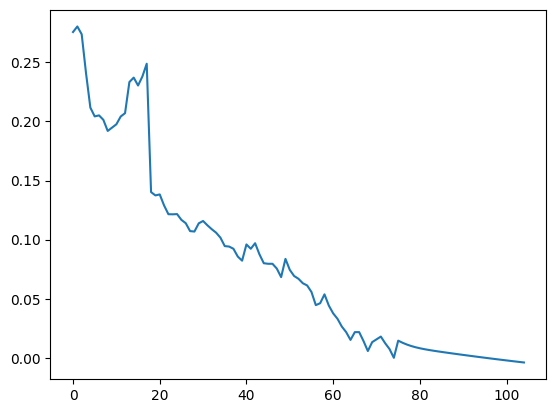

In [29]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[424:])

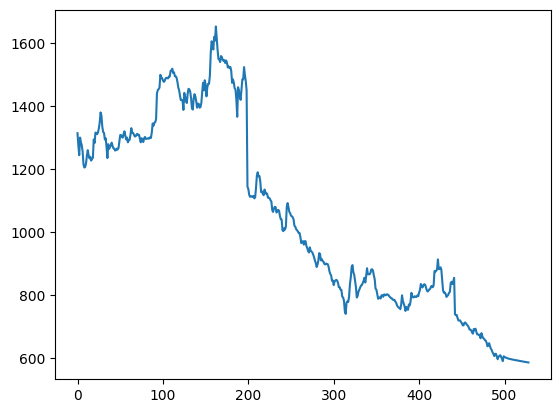

In [30]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)